In [ ]:
!pip install nltk

In [2]:
import pandas as pd
import numpy
import random
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# crear un nuevo df solo con las columnas 'text' y 'sentiment'
df = pd.read_csv('/content/drive/MyDrive/Tweets.csv')
new_df = df[['text', 'sentiment']]
new_df.to_csv('/content/drive/MyDrive/new_file.csv', index=False)


In [ ]:
new_df.dropna(inplace=True)
new_df.to_csv('/content/drive/MyDrive/new_file_clean.csv', index=False)

In [17]:
labeled_data = []

for i, row in new_df.iterrows():
    text = row['text']
    sentiment = row['sentiment']

    if sentiment == 'positive':
        label = 1
    elif sentiment == 'negative':
        label = -1
    else:
        label = 0

    labeled_data.append((text, label))

with open('/content/drive/MyDrive/labeled_data.csv', 'w') as file:
    for data in labeled_data:
        file.write(f'{data[0]};{data[1]}\n')


In [20]:
# dividir los datos etiquetados en conjuntos de entrenamiento y prueba (80-20)
with open('/content/drive/MyDrive/labeled_data.csv', 'r') as file:
    data = file.readlines()

random.shuffle(data)

train_data = data[:int(0.8 * len(data))]
test_data = data[int(0.8 * len(data)):]

with open('/content/drive/MyDrive/train_data.csv', 'w') as file:
    for data in train_data:
        file.write(data)

with open('/content/drive/MyDrive/test_data.csv', 'w') as file:
    for data in test_data:
        file.write(data)


Con este código se crea un nuevo archivo csv con los datos etiquetados, limpios y divididos en conjuntos de entrenamiento y prueba, listos para ser utilizados para entrenar y evaluar.

In [80]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Cargar datos de entrenamiento y prueba

train_df = pd.read_excel('/content/drive/MyDrive/train_data.xlsx', names=['text', 'label'])
test_df = pd.read_excel('/content/drive/MyDrive/test_data.xlsx', names=['text', 'label'])

print(train_df.head())
print(test_df.head())

In [77]:
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))

X_train = vectorizer.fit_transform(train_df['text'])
y_train = train_df['label']

X_test = vectorizer.transform(test_df['text'])
y_test = test_df['label']

In [ ]:
model = LinearSVC()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.corpus import stopwords

In [ ]:
train_df = pd.read_excel('/content/drive/MyDrive/train_data.xlsx', names=['text', 'label'])
test_df = pd.read_excel('/content/drive/MyDrive/test_data.xlsx', names=['text', 'label'])
print(train_df.head())
print(test_df.head())

In [27]:
import nltk
nltk.download('stopwords')

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text) 
    text = re.sub(r'@\w+', '', text) 
    text = re.sub(r'http\S+', '', text) 
    text = ' '.join(word for word in text.split() if word not in stopwords.words('english'))
    return text

train_df['text'] = train_df['text'].apply(clean_text)
test_df['text'] = test_df['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_df['text'])
X_test = vectorizer.transform(test_df['text'])
X_train
# Aquí cree una representación numerica para el conjunto de texto

<21979x24458 sparse matrix of type '<class 'numpy.int64'>'
	with 161163 stored elements in Compressed Sparse Row format>

In [13]:
tfidf_transformer = TfidfTransformer() # ponderaciones tf-idf. Term Frequency-Inverse Document Frequency
X_train_tfidf = tfidf_transformer.fit_transform(X_train)
X_test_tfidf = tfidf_transformer.transform(X_test)

In [ ]:
svm = LinearSVC()
svm.fit(X_train_tfidf, train_df['label'])

In [ ]:
y_pred = svm.predict(X_test_tfidf)
print('Accuracy:', accuracy_score(test_df['label'], y_pred))
print('Matriz de confusión:\n', confusion_matrix(test_df['label'], y_pred))
print('Classification report:\n', classification_report(test_df['label'], y_pred))

In [ ]:
# Entrenar modelo
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(train_df['text'])
y_train = train_df['label']

model = LogisticRegression()
model.fit(X_train, y_train)

X_test = vectorizer.transform(test_df['text'])
y_test = test_df['label']

y_pred = model.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred) # matriz de confusión
print(conf_matrix)

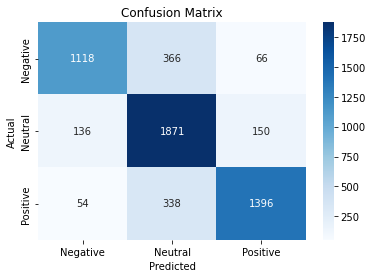

In [53]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicción')
plt.ylabel('Real')
plt.xticks([0.5, 1.5, 2.5], ['Negative', 'Neutral', 'Positive'])
plt.yticks([0.5, 1.5, 2.5], ['Negative', 'Neutral', 'Positive'])

plt.title('Matriz de confusión')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
positive_count = test_df[test_df['label'] == 1]['label'].count()
negative_count = test_df[test_df['label'] == -1]['label'].count()
neutral_count = test_df[test_df['label'] == 0]['label'].count()


total_count = len(test_df)
positive_percent = positive_count / total_count * 100
negative_percent = negative_count / total_count * 100
neutral_percent = neutral_count / total_count * 100

labels = ['Positivo', 'Negativo', 'Neutral']
values = [positive_count, negative_count, neutral_count]
colors = ['#2ecc71', '#e74c3c', '#95a5a6'] #verde, rojo, gris
explode = [0.1, 0, 0]

plt.pie(values, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%')
plt.title('Sentimientos en tweets')
plt.suptitle(f'Total de tweets: {total_count}')
plt.legend(title='Sentimientos', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [ ]:
plt.bar(labels, values)

plt.title('Conteo de sentimientos')
plt.xlabel('Sentimientos')
plt.ylabel('Conteo')

plt.show()

###Nuevo
Utilizar la clase Pipeline de scikit-learn para construir un flujo de trabajo de procesamiento de texto y clasificación.

* CountVectorizer()
* TfidfTransformer()
* MultinomialNB()

In [9]:
#@title import
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
train_df = pd.read_excel('/content/drive/MyDrive/train_data.xlsx', names=['text', 'label'])
test_df = pd.read_excel('/content/drive/MyDrive/test_data.xlsx', names=['text', 'label'])
print(train_df.head())
print(test_df.head())

In [10]:
import nltk
nltk.download('stopwords')

stemmer = PorterStemmer() #para reducir la palabra a su forma base
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return " ".join(words)

train_df['text'] = train_df['text'].apply(preprocess_text)
test_df['text'] = test_df['text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
text_clf = Pipeline([    ('vect', CountVectorizer()),    ('tfidf', TfidfTransformer()),    ('clf', MultinomialNB()),])
text_clf.fit(train_df['text'], train_df['label'])
#modelo de clasificación Naive Bayes

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [12]:
accuracy = text_clf.score(test_df['text'], test_df['label'])
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 74.69%
